 ## Load the dataset and perform basic data exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 1. Basic data exploration.

In [3]:
df.shape # gives total number or rows and columns in the dataset

(178, 14)

In [4]:
df.info() # gives informartion about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe() # gives Description(Count, mean,mode,std_dev,min,25%,50%,75% and max) about the dataset

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2. Examine the distribution of features using histograms, box plots, or density plots.

### Histograms

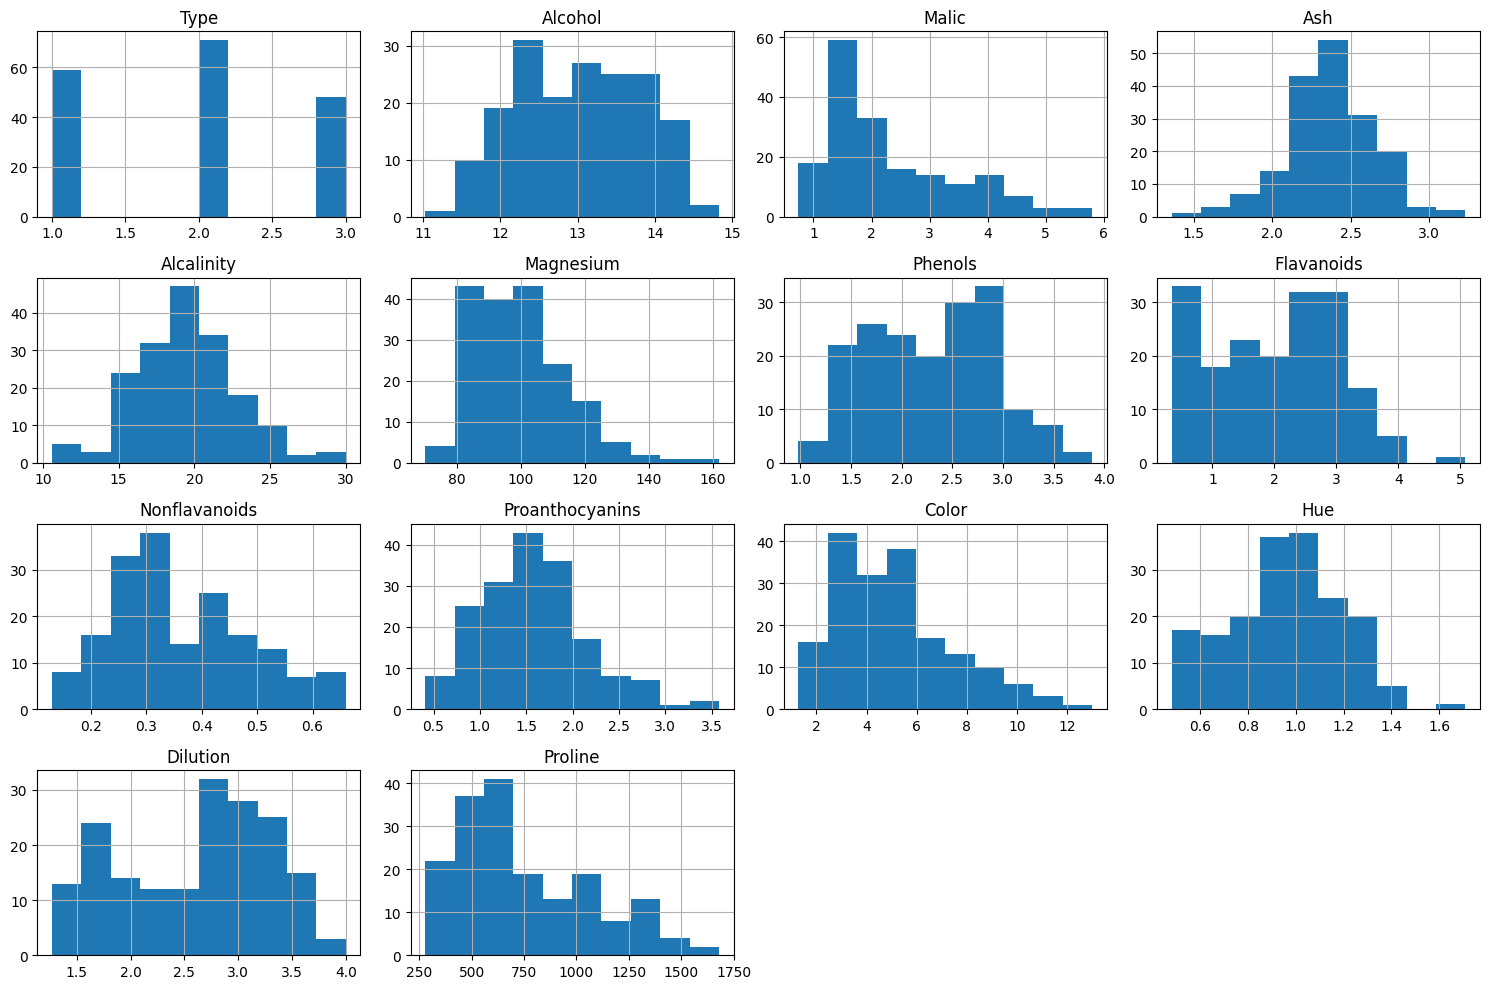

In [7]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### Box Plots

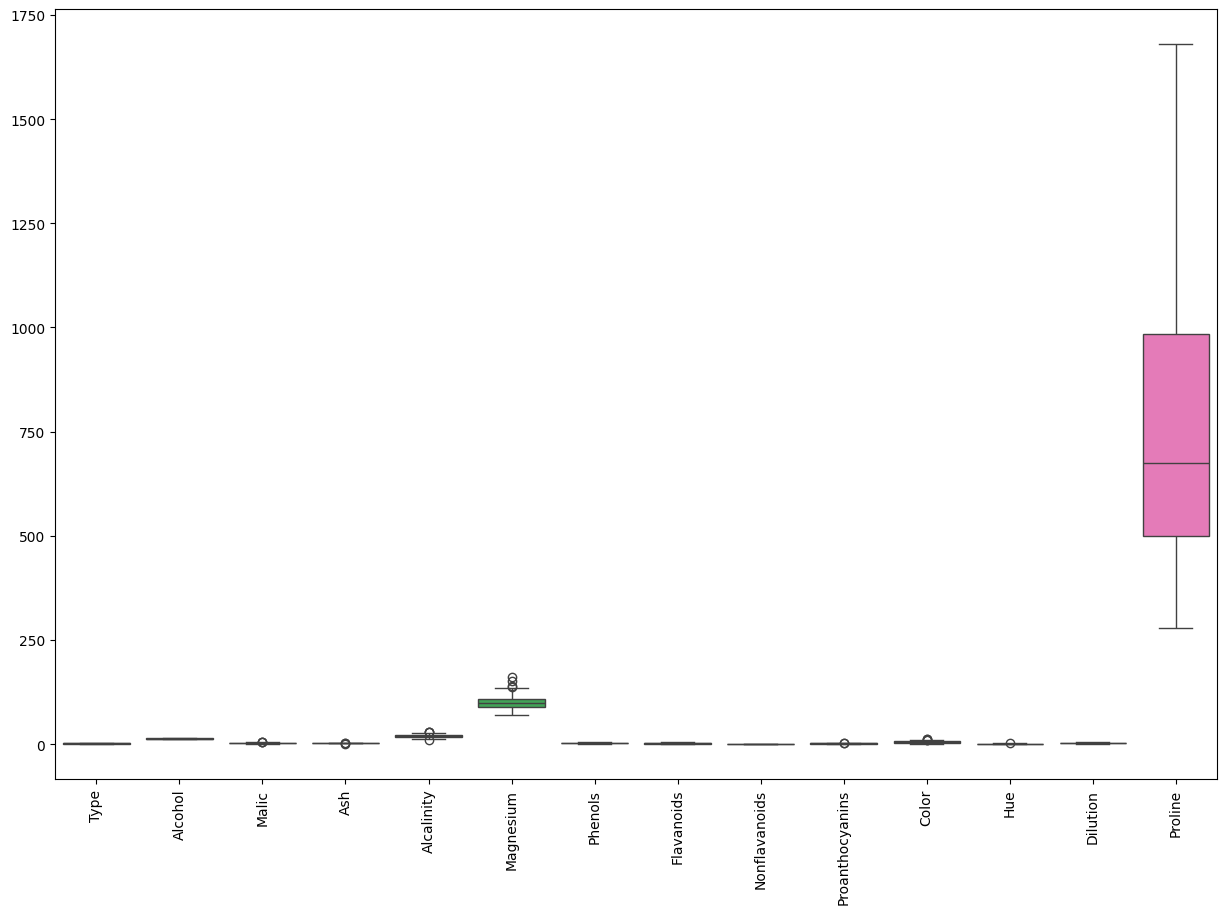

In [8]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

### Density plots

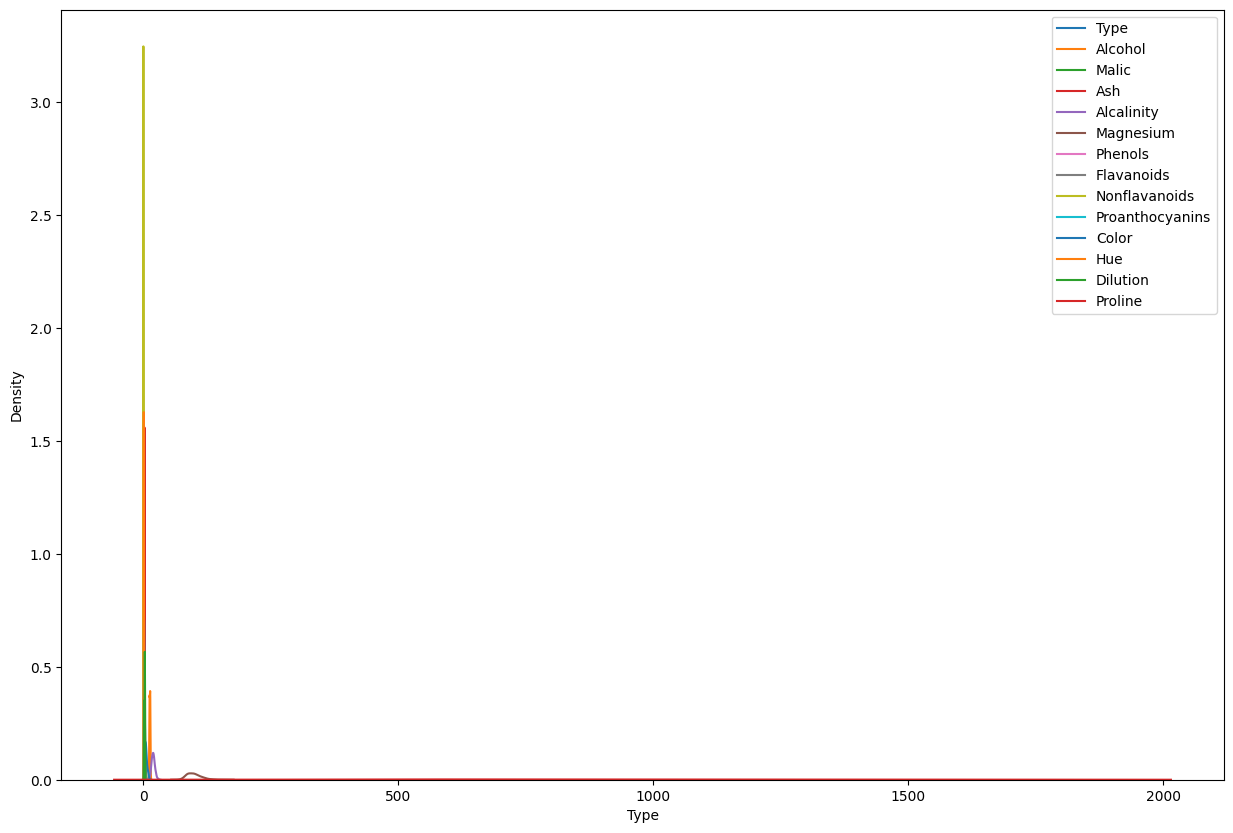

In [9]:
plt.figure(figsize=(15, 10))
for column in df.columns:
    sns.kdeplot(df[column], label=column)
plt.legend()
plt.show()

# 3. Investigate correlations between features to understand relationships within the data.

### Correlation matrix

In [10]:
correlation_matrix = df.corr()
correlation_matrix

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


### Heatmap

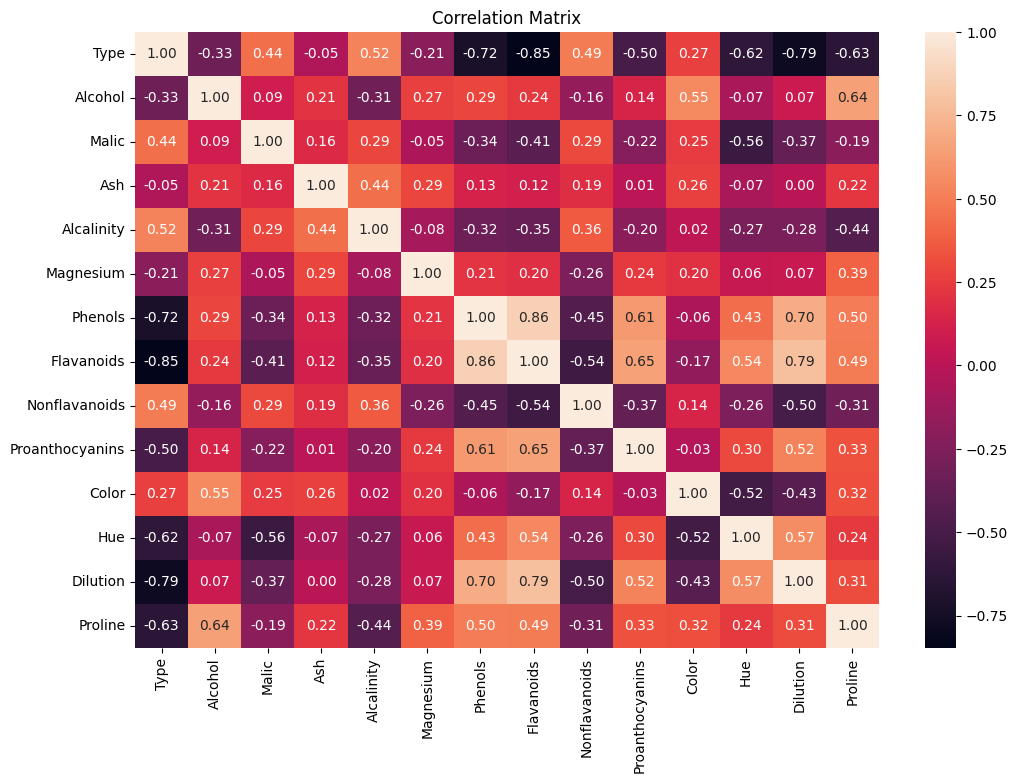

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 1. Standardize the features to ensure they have a mean of 0 and a standard deviation of 1.

### Standardizing the features

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

## 2. Implement PCA to reduce the dimensionality of the dataset.

In [13]:
 ## Apply PCA

In [14]:
pca = PCA()
pca.fit(data_scaled)

PCA()

## 3. Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

### Scree plot

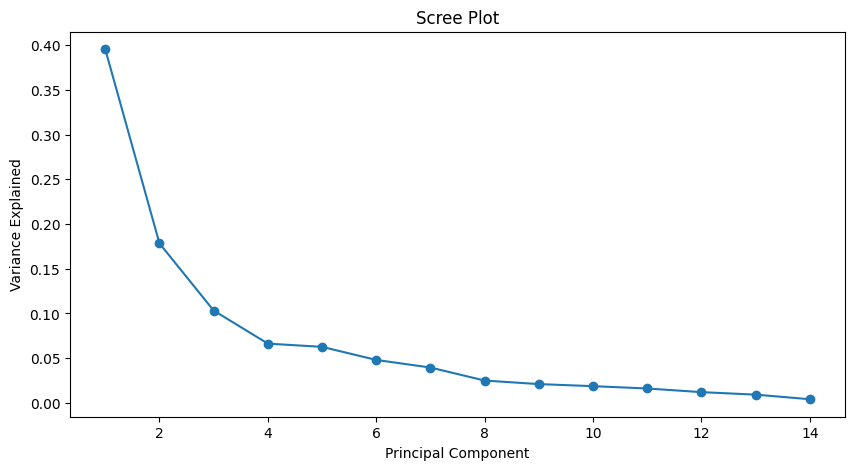

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [16]:
## Cumulative explained variance

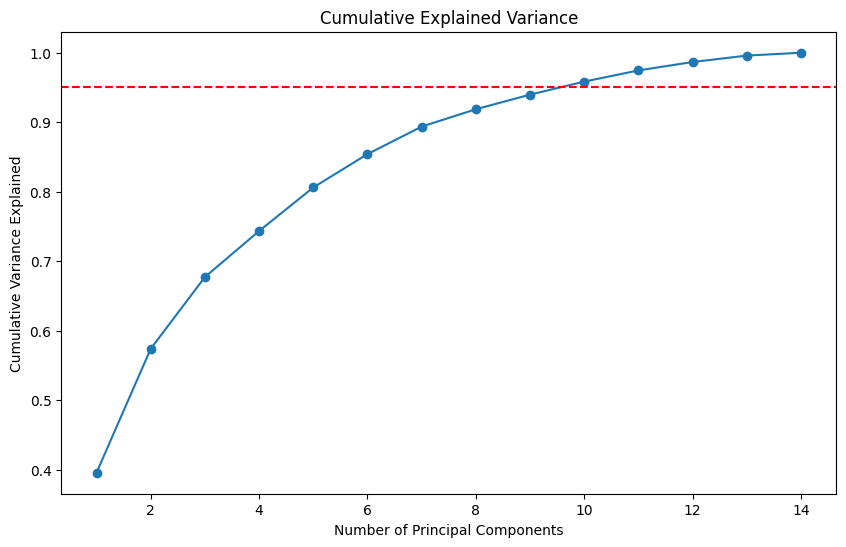

In [17]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='red', linestyle='--')
plt.show()

## 4. Transform the original dataset into the principal components.

- Transform the data

In [18]:
pca_components = pca.transform(data_scaled)

# Task 3: Clustering with Original Data
## 1. Apply a clustering algorithm (e.g., K-means) to the original dataset.

- Applying K-means

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(data_scaled)
df['Cluster'] = clusters_original

## 2. Visualize the clustering results using appropriate plots.

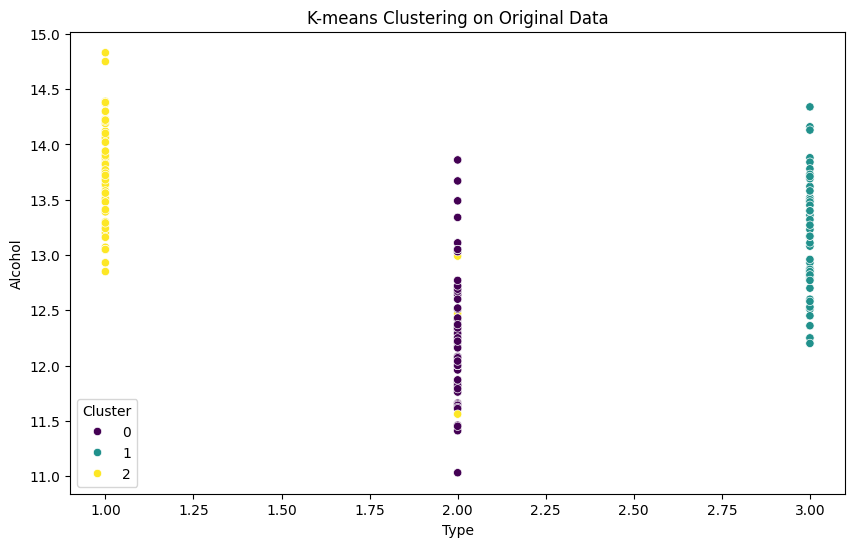

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering on Original Data')
plt.show()

## 3. Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [21]:
silhouette = silhouette_score(data_scaled, clusters_original)
davies_bouldin = davies_bouldin_score(data_scaled, clusters_original)

print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.3157075522617727


# Task 4: Clustering with PCA Data

## 1. Apply the same clustering algorithm to the PCA-transformed dataset.

- Apply K-means to PCA components

In [22]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_components)

## 2. Visualize the clustering results obtained from PCA-transformed data.

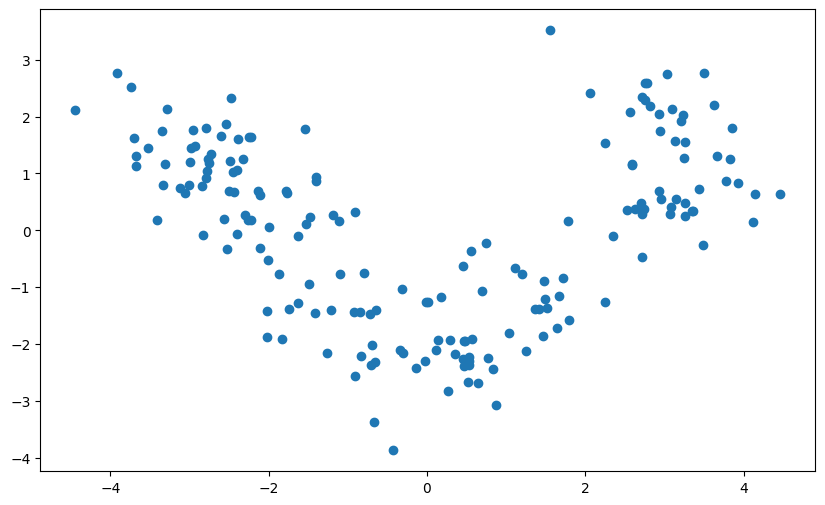

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1])

## Principal Component Analysis (PCA)
## 1. Summarize the key findings and insights from the assignment. 

- Purpose: Dimensionality reduction, feature transformation, and noise elimination, Grouping similar data points to identify patterns or structures, Enhance clustering performance and interpretability in high-dimensional datasets.
- Simplifies high-dimensional data for visualization and analysis.
- Clustering is flexible and widely applicable but depends on choosing the right algorithm and parameters

# 2. Discuss the practical implications of using PCA and clustering in data analysis.

PCA is ideal in scenarios where dimensionality reduction or feature transformation is needed. Specific use cases include:

- High-Dimensional Data : Use PCA to reduce dimensions and avoid the curse of dimensionality, which can degrade model performance or make computation infeasible.
- Data Visualization    : Apply PCA to reduce dimensions to 2D or 3D for plotting, making it easier to interpret the data visually.
- Noise Reduction       : Use PCA to focus on components that capture the most variance, effectively filtering out noise.

## 3. Provide recommendations for when to use each technique based on the analysis conducted.

Scenario   : High-dimensional data,
Technique  : PCA,
Why?       : Reduces complexity and avoids overfitting.